<a href="https://colab.research.google.com/github/Tnoso80133/AI/blob/main/keras_CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,466 (91.66 KB)

 Trainable params: 23,466 (91.66 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(type(train_data))
print(train_data.shape)
print(type(train_label))
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [4]:
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.6613 - loss: 14.2323
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.9488 - loss: 0.3825
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.9711 - loss: 0.1270
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.9797 - loss: 0.0761
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.9853 - loss: 0.0524
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 156ms/step - accuracy: 0.9893 - loss: 0.0377
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.9913 - loss: 0.0280
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.9929 - loss: 0.0223
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 154ms/step - accuracy: 0.9943 - loss: 0.0187
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 145ms/step - accuracy: 0.9958 - loss: 0.0130


In [5]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9732 - loss: 0.1404
0.9767000079154968


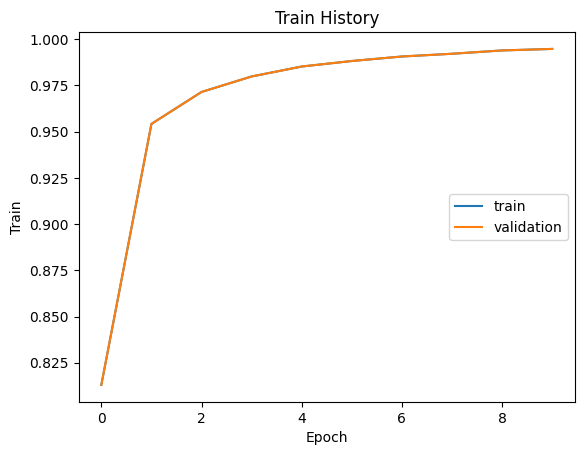

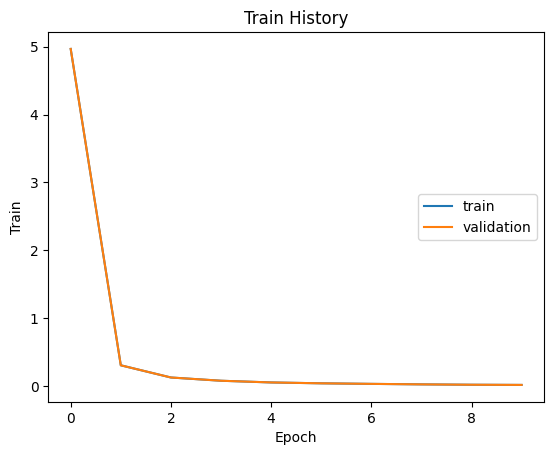

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,3,0,1,1,1,2,1,0
1,0,1126,0,2,0,2,2,3,0,0
2,7,3,995,7,2,0,2,13,2,1
3,0,0,4,991,0,9,0,4,1,1
4,2,0,1,0,962,0,5,2,1,9
5,2,0,0,3,0,885,1,0,0,1
6,4,2,0,0,2,12,937,0,1,0
7,0,1,5,4,1,0,0,1012,1,4
8,9,0,2,11,4,5,4,7,929,3


In [6]:
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])